# Tutorial 2 - Integration Techniques
Today we will be using the SymPy Python library in order to look at _Integration by Trigonometric Substitution_ and _Partial Fraction Decomposition_.

Don't forget that SymPy requires you to first define any variables using the following command `x = sy.symbols('x')`.

In [1]:
import sympy as sy
sy.init_printing()

## Integration by Trigonometric Substitution
The main idea behind trigonometric substitution is to allow us to evaluate an integral with two terms under a square root as discussed in __[Section 6.3](https://opentext.uleth.ca/apex-accelerated/sec_trig_sub.html)__ of the textbook. 

For each of the following questions discuss in your groups what substitution to use and find the new integrals. Then use the SymPy integral function to evaluate theses new integrals.
### Question 1
Evaluate the definite integral 
$$\int \frac{1}{\sqrt{x^2+9}}\,\, dx$$
> a. Using a trigonometric substitution

The pattern $x^2+9$ suggests a tangent substitution: $x=3\tan\theta$, so $dx=3\sec^2\theta d\theta$ and $\sqrt{x^2+9} = 3\sec\theta$.
The integral becomes
$$\int \frac{3\sec^2\theta}{3\sec\theta}d\theta = \int \sec\theta d\theta = \ln\lvert \sec\theta+\tan\theta\rvert +C$$

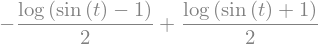

In [4]:
t = sy.symbols('t')
sy.integrate(sy.sec(t),t)

> b. Using a hyperbolic substitution

We try $x=3\sinh(t)$, so that $dx=3\cosh(t)\,dx$, and $x^2+9 = 9(\sinh^2(t)+1)=9\cosh^2(t))$, so
$$\int\frac{1}{\sqrt{x^2+9}}\,dx = \int \frac{3\cosh(t)}{3\cosh(t)}\,dt = \int dt = t+C = \sinh^{-1}(x/3)+C$$

> c. Directly using the SymPy integral function.

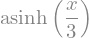

In [6]:
x = sy.symbols('x')
sy.integrate(1/sy.sqrt(x**2+9),x)

Are all three of your answers equivalent?

> Double click here to edit and explain your answer.

### Question 2
Evaluate the definite integral 
$$\int x \, \sqrt{x^2-16}\,\, dx$$
> a. Using a trigonometric substitution

Put $x=4\sec\theta$, so $dx=4\sec\theta\tan\theta\,d\theta$ and $x^2-16 = 16\tan^2\theta$. Then
$$\int x\sqrt{x^2-16}\,dx = \int 4\sec\theta(4\tan\theta)\cdot 4\sec\theta\tan\theta\,d\theta = 64\int \sec^2\theta\tan^2\theta\,d\theta$$

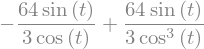

In [7]:
sy.integrate(64*(sy.sec(t))**2*(sy.tan(t))**2,t)

> b. Using a hyperbolic substitution

This time, if we put $x=4\cosh(t)$, we get $dx = 4\sinh(t)$ and $x^2-16 = 16\cosh^2(t)-16=16\sinh^2(t)$. Therefore,
$$\int x\sqrt{x^2-16}\,dx = \int 4\cosh(t)(4\sinh(t))\cdot 4\sinh(t)\,dt = 64\int \sinh^2(t)\cosh(t)\,dt$$

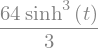

In [9]:
sy.integrate(64*(sy.sinh(t))**2*sy.cosh(t),t)

> c. Directly using the SymPy integral function.

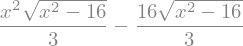

In [10]:
sy.integrate(x*sy.sqrt(x**2-16),x)

Are all three of your answers equivalent?

For $x=4\sec(\theta)$, we have $\sec(\theta)=x/4$ and $\tan(\theta) = \frac14\sqrt{x^2-16}$. The output we got above can be written as
$$\frac13\left(-64\tan(\theta)+64\tan\theta\sec^2(\theta)\right)=\frac{64}{3}\left(-\frac14\sqrt{x^2-16}+\frac{x^2}{16}\cdot\frac14\sqrt{x^2-16}\right),$$
which simplifies to the answer above.

For $x=4\cosh(t)$, we get
$$\frac{64}{3}\sinh^3(t) = \frac{64}{3}\left(\frac{1}{4^3}(x^2-16)^{3/2}\right)=\frac13\left(\sqrt{x^2-16}(x^2-16)\right),$$
which also simplifies to the answer above once we expand.

## Partial Fraction Decomposition
Partial fraction decomposition is a useful process when integrating many rational function as discussed in __[Section 6.4](https://opentext.uleth.ca/apex-accelerated/sec_partial_fraction.html)__ of the textbook. 

Using the SymPy functors in your small groups practice finding the partial fraction decomposition.
### Question 3
Find the partial fraction decomposition of the following function 
$$ \frac{3x^2 +2x +1}{x^4 + x^3 + x^2 + x}.$$

Begin by factoring the denominator using `sy.factor`.

In [11]:
x = sy.Symbol('x')
sy.factor(x**4+x**3+x**2+x,x)

>Rewrite the fraction in partial fraction form. For example
$$ \frac{x}{x(x+1)} = \frac{a}{x}+\frac{b}{x+1} = \frac{a(x+1) + bx}{x(x+1)}. $$

Evaluate the factor the numerator using the following input:

We have
$$\frac{a}{x}+\frac{b}{x+1}+\frac{cx+d}{x^2+1} = \frac{a(x+1)(x^2+1)+bx(x^2+1)+(cx+d)x(x+1)}{x(x+1)(x^2+1)} = \frac{3x^2+2x+1}{x^4+x^3+x^2+x},$$
so 
$$a(x+1)(x^2+1)+bx(x^2+1)+(cx+d)x(x+1)=3x^2+2x+1$$

In [13]:
a, b, c, d, x = sy.symbols('a b c d x')
f=(a*(x+1)*(x**2+1)+b*x*(x**2+1)+(c*x+d)*x*(x+1)).expand(basic=True)
sy.collect(f,x)

Define a matrix A and vector B to represent the system of linear equations.

We have
$$(a+b+c)x^3+(a+c+d)x^2+(a+b+d)x+a=3x^2+2x+1,$$
so
$$\begin{aligned}
1a+1b+1c+0d&=0\\
1a+0b+1c+1d&=3\\
1a+1b+0c+1d&=2\\
1a+0b+0c+0d&=1\end{aligned}$$

That gives:

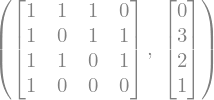

In [14]:
A = sy.Matrix([[1,1,1,0],[1,0,1,1],[1,1,0,1],[1,0,0,0]])
B = sy.Matrix([0,3,2,1])
A,B

Solve the system of linear equations using either an augmented matrix or matrix algebra. You may need to use Google to aid you in this step.

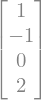

In [15]:
A**(-1)*B

This gives us $a=1, b=-1, c=0, d=2$.

Find the partial fraction decomposition directly using the `apart` function.

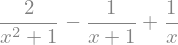

In [16]:
g = (3*x**2+2*x+1)/(x**4+x**3+x**2+x)
g.apart()

Do the two answers agree?

They do! Our answer above predicted the decomposition $\frac1x-\frac{1}{x+1}+\frac{2}{x^2+1}$, which is the same as what we get from `apart`.

### Challenge
Using your code for question 3. Find the partial fraction decomposition of the following function 
$$ \frac{3x^2 +2x +1}{x^4 + x^2}.$$

In [17]:
sy.factor(x**4+x**2)

We have
$$\frac{3x^2+2x+1}{x^4+x^2} = \frac{a}{x}+\frac{b}{x^2}+\frac{cx+d}{x^2+1} = \frac{ax(x^2+1)+b(x^2+1)+(cx+d)x^2}{x^4+x^2}$$

In [18]:
a, b, c, d, x = sy.symbols('a b c d x')
f=(a*x*(x**2+1)+b*(x**2+1)+(c*x+d)*x**2).expand(basic=True)
sy.collect(f,x)

So this time, $a+c=0, b+d=3, a=2, b=1$. We don't even really need the matrix. Already $a=2$ and $b=1$. Then $c=-a=-2$ and $d=3-b=2$. Therefore,
$$\frac{3x^2+2x+1}{x^4+x^2} = \frac2x+\frac{1}{x^2}+\frac{2-2x}{x^2+1}.$$

Confirming with `apart`, we get:

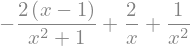

In [19]:
g = (3*x**2+2*x+1)/(x**4+x**2)
g.apart()